Import dữ liệu



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Thực tập tốt nghiệp (1)/Data/all_stocks_5yr.csv')
print(df)

              date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]


In [ ]:
# Lấy ra 5000 dòng đầu tiên của DataFrame df
df = df.head(5000)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


Kiểm tra dữ liệu có null không

In [4]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [5]:
df['open'] = df['open'].fillna(method="pad")
df['high'] = df['high'].fillna(method="pad")
df['low'] = df['low'].fillna(method="pad")

In [6]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [ ]:
for column in df.columns:
  percentage = df[column].isnull().mean()
  print(f'{column}: {round(percentage*100, 2)}%')

date: 0.0%
open: 0.0%
high: 0.0%
low: 0.0%
close: 0.0%
volume: 0.0%
Name: 0.0%


In [7]:
df.describe()

,open,high,low,close,volume
count,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05
mean,83.023831,83.778918,82.256670,83.043763,4.321823e+06
std,97.379721,98.208681,96.508495,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


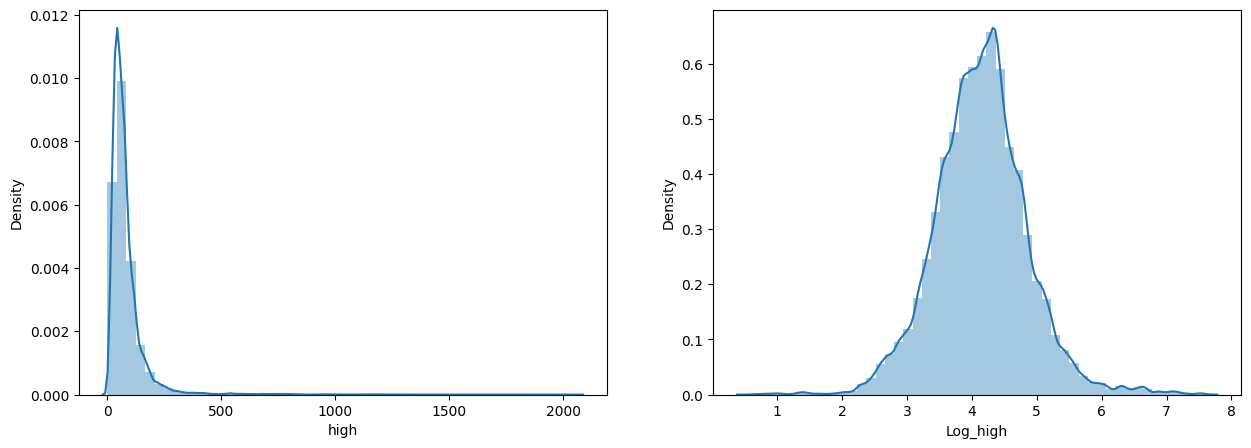

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df['Log_high'] = np.log(df['high'])
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['high'], ax = axes[0])
sns.distplot(df['Log_high'], ax = axes[1])
plt.show()

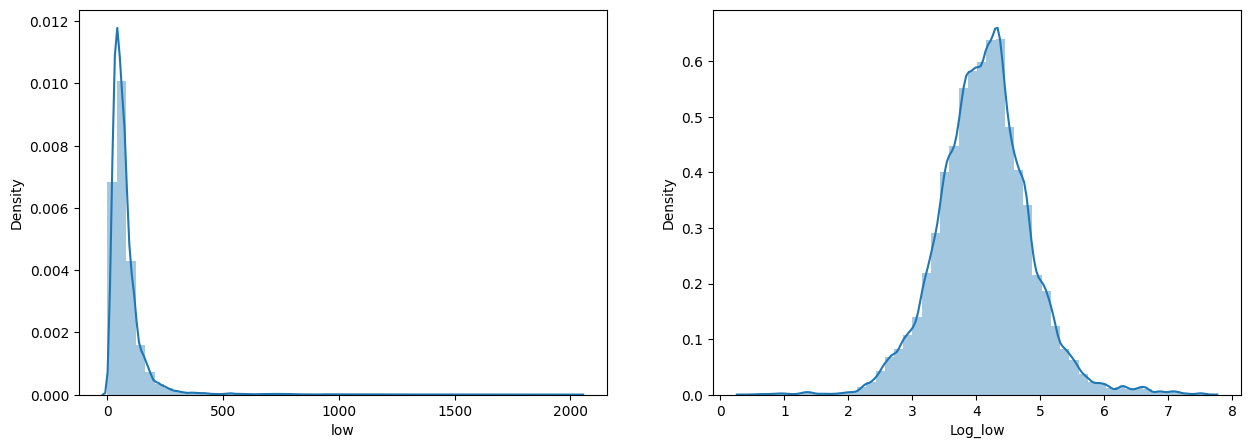

In [9]:
df['Log_low'] = np.log(df['low'])
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['low'], ax = axes[0])
sns.distplot(df['Log_low'], ax = axes[1])
plt.show()

In [10]:
df['Log_high'] = df['high'].apply(lambda x:np.log(x))
df['Log_low'] = df['low'].apply(lambda x:np.log(x))
print(df)

              date   open   high    low  close    volume Name  Log_high  \
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL  2.716018   
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL  2.708717   
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL  2.674838   
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL  2.704042   
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL  2.705380   
...            ...    ...    ...    ...    ...       ...  ...       ...   
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS  4.360164   
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS  4.358246   
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS  4.342766   
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS  4.311604   
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS  4.317488   

         Log_low  
0       2.683074  
1       2.657458  
2       2.646175  
3       2.656757  
4   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5000 non-null   object 
 1   open      5000 non-null   float64
 2   high      5000 non-null   float64
 3   low       5000 non-null   float64
 4   close     5000 non-null   float64
 5   volume    5000 non-null   int64  
 6   Name      5000 non-null   object 
 7   Log_high  5000 non-null   float64
 8   Log_low   5000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 351.7+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo encoder
encoder = LabelEncoder()

# Mã hóa cột 'Name'
df['Name'] = encoder.fit_transform(df['Name'])

# Loại bỏ cột 'date'
df = df.drop('date', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      5000 non-null   float64
 1   high      5000 non-null   float64
 2   low       5000 non-null   float64
 3   close     5000 non-null   float64
 4   volume    5000 non-null   int64  
 5   Name      5000 non-null   int64  
 6   Log_high  5000 non-null   float64
 7   Log_low   5000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 312.6 KB


In [ ]:
df.head()

,open,high,low,close,volume,Name,Log_high,Log_low
0,15.07,15.12,14.63,14.75,8407500,0,2.716018,2.683074
1,14.89,15.01,14.26,14.46,8882000,0,2.708717,2.657458
2,14.45,14.51,14.10,14.27,8126000,0,2.674838,2.646175
3,14.30,14.94,14.25,14.66,10259500,0,2.704042,2.656757
4,14.94,14.96,13.16,13.99,31879900,0,2.705380,2.577182


In [12]:
from sklearn.cluster import KMeans

# Tạo DataFrame chứa các cột bạn muốn sử dụng cho việc phân cụm (ở đây, chọn các cột 'open', 'high', 'low', 'close', 'volume')
data = df[['open', 'high', 'low', 'close', 'volume']]

# Khởi tạo mô hình K-means với 3 cụm
kmeans = KMeans(n_clusters=3, random_state=0)

# Tiến hành phân cụm dữ liệu
clusters = kmeans.fit_predict(data)

# Thêm cột 'Cluster' vào DataFrame ban đầu để lưu kết quả phân cụm
df['Cluster'] = clusters

In [14]:
df.head()

,open,high,low,close,volume,Name,Log_high,Log_low,Cluster
0,15.07,15.12,14.63,14.75,8407500,1,2.716018,2.683074,0
1,14.89,15.01,14.26,14.46,8882000,1,2.708717,2.657458,0
2,14.45,14.51,14.10,14.27,8126000,1,2.674838,2.646175,0
3,14.30,14.94,14.25,14.66,10259500,1,2.704042,2.656757,0
4,14.94,14.96,13.16,13.99,31879900,1,2.705380,2.577182,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      5000 non-null   float64
 1   high      5000 non-null   float64
 2   low       5000 non-null   float64
 3   close     5000 non-null   float64
 4   volume    5000 non-null   int64  
 5   Name      5000 non-null   int64  
 6   Log_high  5000 non-null   float64
 7   Log_low   5000 non-null   float64
 8   Cluster   5000 non-null   int32  
dtypes: float64(6), int32(1), int64(2)
memory usage: 332.2 KB


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành features (X) và target (y)
X = df[['open', 'high', 'low', 'close', 'volume', 'Name', 'Log_low', 'Cluster']]
y = df['Log_high']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán đặc trưng Log_high trên tập kiểm tra
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import mean_squared_error

# In ra vài dòng dữ liệu test và so sánh với dữ liệu thật
comparison = pd.DataFrame({'Real Log_high': y_test, 'Predicted Log_high': y_pred})
print(comparison.head())

# Tính toán MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


        Real Log_high  Predicted Log_high
252249       6.656958            6.649167
154331       4.623403            4.626321
507080       4.422208            4.423784
215553       4.483341            4.486155
301370       4.953712            4.954909
Mean Squared Error (MSE): 7.80326638060736e-05


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chia dữ liệu thành features (X) và target (y)
X = df[['open', 'high', 'low', 'close', 'volume', 'Name', 'Log_low', 'Cluster']]
y = df['Log_high']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình SVM
svm_model = SVR(kernel='rbf')  # Chọn kernel 'rbf' cho SVM (Radial Basis Function)

# Huấn luyện mô hình trên tập huấn luyện
svm_model.fit(X_train, y_train)

# Dự đoán đặc trưng Log_high trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)

# In ra vài dòng dữ liệu test và so sánh với dữ liệu thật
comparison_svm = pd.DataFrame({'Real Log_high': y_test, 'Predicted Log_high (SVM)': y_pred_svm})
print(comparison_svm.head())

# Tính toán MSE
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'Mean Squared Error (SVM): {mse_svm}')
